$$
\begin{split}
D_{kl}(P\|Q)&=?\\
P(x)&=\mathcal N(\mu_1,\sigma_1)+\mathcal N(\mu_2, \sigma_2)\\
Q(x)&=\mathcal N(\mu_q=?, \sigma_q=?)
\end{split}
$$

In [35]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

## $P(x)$

In [24]:
mu1, sigma1 = -5, 3
mu2, sigma2 = 10, 1

In [25]:
gaussian1 = torch.distributions.Normal(mu1, sigma1)
gaussian2 = torch.distributions.Normal(mu2, sigma2)

Text(0.5, 1.0, '$\\mu_2$=10,$\\sigma_2$=1')

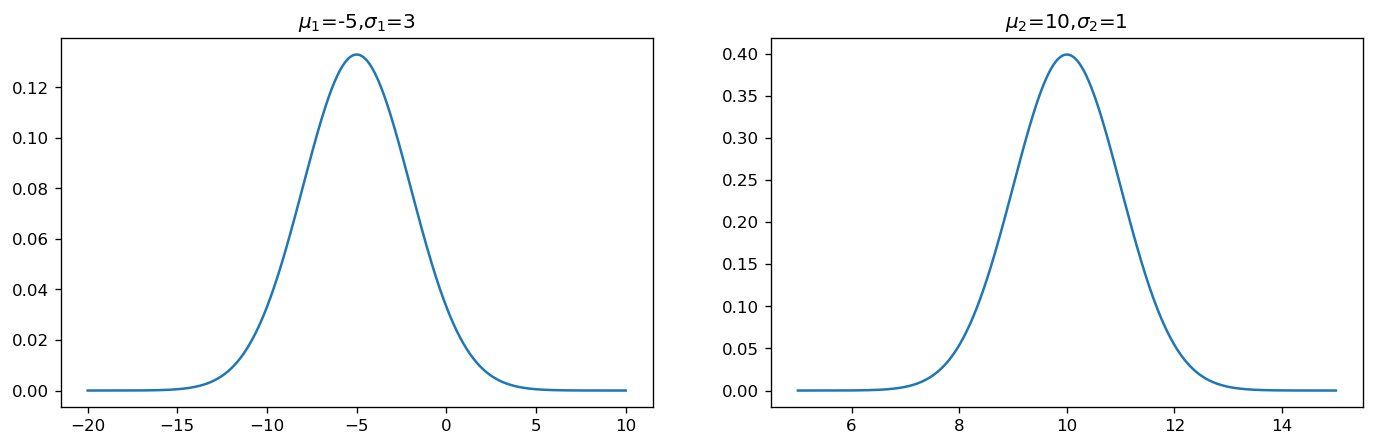

In [26]:
plt.figure(figsize=(14, 4))
x = torch.linspace(mu1-5*sigma1, mu1+5*sigma1, 1000)
plt.subplot(1, 2, 1)
plt.plot(x.numpy(), gaussian1.log_prob(x).exp().numpy())
plt.title(f'$\mu_1$={mu1},$\sigma_1$={sigma1}')

x = torch.linspace(mu2-5*sigma2, mu2+5*sigma2, 1000)
plt.subplot(1, 2, 2)
plt.plot(x.numpy(), gaussian2.log_prob(x).exp().numpy())
plt.title(f'$\mu_2$={mu2},$\sigma_2$={sigma2}')

Text(0.5, 1.0, '$P(X)$')

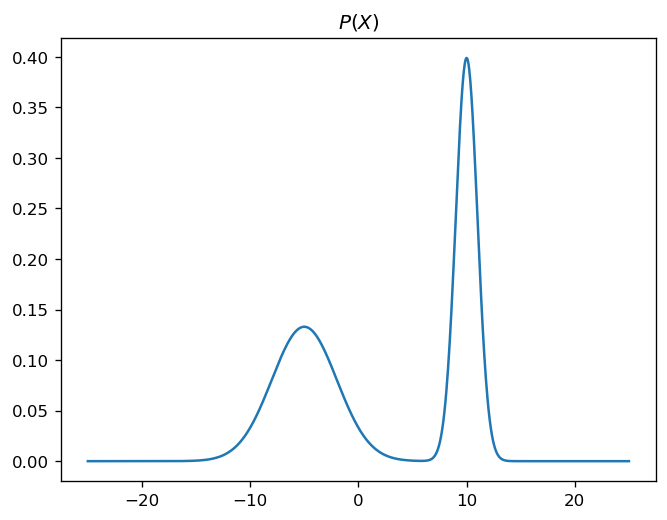

In [29]:
x = torch.linspace(-mu1-mu2-5*sigma1-5*sigma2, mu1+mu2+5*sigma1+5*sigma2, 1000)
px = gaussian1.log_prob(x).exp() + gaussian2.log_prob(x).exp()
plt.plot(x.numpy(), px.numpy())
plt.title(f'$P(X)$')

## Q(x)

In [30]:
mu = torch.tensor([0.0])
sigma = torch.tensor([1.0])

Text(0.5, 1.0, '$Q(X)$')

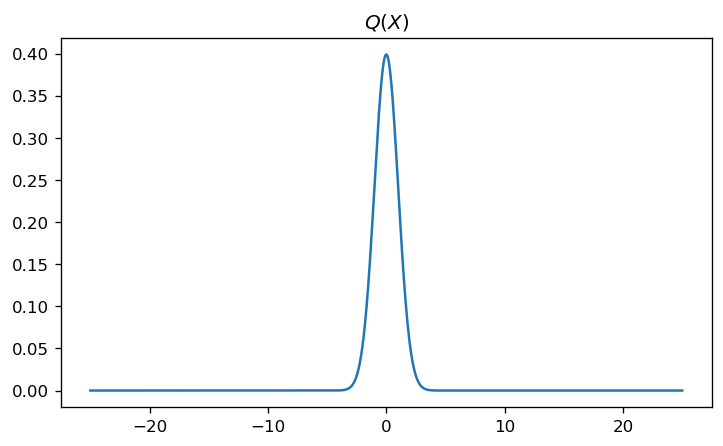

In [33]:
plt.figure(figsize=(7, 4))
x = torch.linspace(-mu1-mu2-5*sigma1-5*sigma2,mu1+mu2+5*sigma1+5*sigma2,1000)
Q = torch.distributions.Normal(mu, sigma) # this should approximate P, eventually :-)
qx = Q.log_prob(x).exp()
plt.plot(x.numpy(),qx.detach().numpy())
plt.title('$Q(X)$')

## kl-div

In [36]:
x = torch.linspace(-mu1-mu2-5*sigma1-5*sigma2,
                   mu1+mu2+5*sigma1+5*sigma2,
                   1000)
px = gaussian1.log_prob(x).exp() + gaussian2.log_prob(x).exp()

In [37]:
qx = Q.log_prob(x).exp()
F.kl_div(qx.log(), px)

/home/whaow/anaconda3/lib/python3.10/site-packages/torch/nn/functional.py:2919: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(


tensor(inf)

In [38]:
qx = Q.log_prob(x)
F.kl_div(qx, px)

tensor(1.3067)

## kl-div as the loss

In [40]:
x = torch.linspace(-mu1-mu2-5*sigma1-5*sigma2,
                   mu1+mu2+5*sigma1+5*sigma2,
                   1000)
px = gaussian1.log_prob(x).exp() + gaussian2.log_prob(x).exp()

In [88]:
def optimize_loss(px, ):
    
    mu1 = torch.tensor([0.], requires_grad=True)
    sigma1 = torch.tensor([1.], requires_grad=True)
    
    mu2 = torch.tensor([2.], requires_grad=True)
    sigma2 = torch.tensor([4.], requires_grad=True)
    
    opt = torch.optim.Adam([mu1, sigma1, mu2, sigma2])
    
    all_mu = []
    all_sigma = []
    loss_val = []
    all_qx = []
    
    for i in range(10000):
        
#         Q = torch.distributions.Normal(mu, sigma)
#         qx = Q.log_prob(x)
        
        Q = torch.distributions.Normal(mu1+mu2, torch.sqrt(torch.pow(sigma1, 2) + torch.pow(sigma2, 2)))
        qx = Q.log_prob(x)
        
        loss = F.kl_div(qx, px)
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        loss_val.append(loss.detach().numpy())
        all_mu.append(mu1.data.numpy()[0])
        all_qx.append(qx.exp().detach().numpy())
        
        if i % 1000 == 0:
            print(i, loss_val[-1])
            
    plt.subplot(1, 2, 1)
    plt.plot(loss_val)
    
    plt.subplot(1, 2, 2)
    plt.plot(all_mu)
    return (mu1.data.numpy()[0], sigma1.data.numpy()[0]), (mu2.data.numpy()[0], sigma2.data.numpy()[0]), all_qx

0 0.08697003
1000 0.06964281
2000 0.06392303
3000 0.06161791
4000 0.060687713
5000 0.06036569
6000 0.060288273
7000 0.060279112
8000 0.06027881
9000 0.06027881


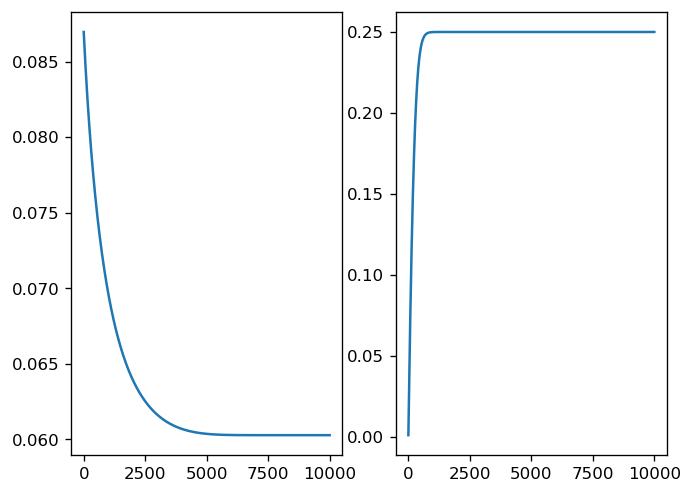

In [89]:
mu, sigma, all_qx = optimize_loss(px,)

In [90]:
mu

(0.2500084, 4.2905974)

In [91]:
sigma

(2.249992, 6.545254)

In [55]:
len(all_qx)

10000